**Modelo de red neuronal Transformer**

Este archivo consta de los codigos y conclusiones de:
* 1.Carga de librerias y datos
* 2.Normalizar Datos.
* 3.Preparar datos para realizar aprendizaje supervizado.
* 4.Modelo Transformer
* 5.Evaluacion del modelo


#1.Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [39]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

# import the model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time,joblib

In [40]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [41]:
pip install h5py --quiet

In [42]:
cd /content/gdrive/MyDrive/Tesis/Datos

/content/gdrive/MyDrive/Tesis/Datos


Se obtiene conjunto de datos

In [43]:
predictor_variables=pd.read_csv('predictor_variables.csv', index_col='Date')
target_variables=pd.read_csv('target_variables.csv', index_col='Date')
df=pd.read_csv('df_modelo.csv', index_col='Date')

In [44]:
def divide_array(array, num_parts,largo):
  i=0
  j=0
  j=largo
  series_results=[]

  x=[]
  for k in range(20):
    aux= array[i:j]
    j=largo+j
    i=i+largo
    series_results.append(aux)
    x.append(aux)

  return x

In [45]:
series=divide_array(df,20,143)
predict_series=divide_array(predictor_variables,20,142)
target_series=divide_array(target_variables,20,142)

##Sección nueva

In [46]:
#Setear semilla
np.random.seed(42)

In [47]:
import joblib,os

In [48]:
result_svr=pd.read_csv('results_SVR_Wallmart.csv')
result_svr = result_svr.sort_values(by='MSE', ascending=True)
result_svr.head(5)

,index,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
101,101,SVR_Wallmart_21_2_linear_0.1_0.2_scale,21,2,0.089041,0.411165,8.750326,0.641222,0.477221
196,196,SVR_Wallmart_40_2_linear_0.1_0.2_scale,40,2,0.090399,0.411165,8.750326,0.641222,0.477221
156,156,SVR_Wallmart_32_2_linear_0.1_0.2_scale,32,2,0.096840,0.411165,8.750326,0.641222,0.477221
139,139,SVR_Wallmart_28_5_linear_0.1_0.1_scale,28,5,0.549153,0.412342,9.551642,0.642138,0.478596
109,109,SVR_Wallmart_22_5_linear_0.1_0.1_scale,22,5,0.543340,0.412342,9.551642,0.642138,0.478596


In [49]:
nombre_archivo=result_svr['nameModel'].iloc[0]
nombre_archivo="SVR_linear_0.1_0.2_scale"

In [50]:
nombre_json=nombre_archivo+"."+"pkl"
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos/result_SVR'
ruta = os.path.join(carpeta_destino, nombre_json)

In [51]:
load_model = joblib.load(ruta) # Carga del modelo.


##Narmax

In [52]:
#Se da formato de entradas como: Un tensor 3D con la forma [batch, timesteps, feature]
predictor_variable=[]
target_variable=[]
for serie, target in zip(predict_series,target_series):
  predictor=np.array(serie)

  predictor_variable.append(predictor)

  target=np.array(target)
  target_variable.append(target)
  target_shape=target.shape

In [53]:
target_shape

(142, 1)

In [54]:
def narmax_data(data,modelo,predictor,shape_target,retrasos,target):
  #Se realiza prediccion
  results = modelo.predict(predictor)
  results = results.reshape(shape_target)
  target=np.array(target_variables)

  error=[]
  aux=0
  for prediccion, real in zip(results,target):
    aux=real-prediccion
    error.append(aux[0])

  df_narmax = data.iloc[1:]
  # Agregamos el arreglo como nueva columna en el DataFrame
  df_narmax['error'] = error

  return df_narmax

In [55]:
series_time=[]
for serie,predictor,target in zip(series,predictor_variable,target_variable):
  aux=narmax_data(serie,load_model,predictor,target_shape,1,target)
  series_time.append(aux)


In [56]:
series_time[0]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,error
Date,,,,,,,,,,,,,,
2010-02-12,7,9,-1.066339,3.646917,-0.837239,-1.562510,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.315544,1.000733,-0.329480
2010-02-19,7,9,-1.055308,-0.274204,-0.753638,-1.613850,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.293672,1.000733,-0.343897
2010-02-26,7,9,-1.026079,-0.274204,-0.897213,-1.529839,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.272466,1.000733,-0.310874
2010-03-05,7,9,-1.077562,-0.274204,-0.233857,-1.450495,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.251260,1.000733,-0.382358
2010-03-12,7,9,-1.053027,-0.274204,-0.755455,-1.301142,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.230053,1.000733,-0.324447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,7,9,-0.144565,-0.274204,0.661521,1.277528,0.217803,-0.230168,-0.087864,0.147478,0.106075,1.542983,-1.667791,-0.440618
2012-10-05,7,9,-0.360016,-0.274204,0.527639,1.254192,0.100890,-0.233833,-0.086302,0.784767,0.011427,1.615590,-2.403855,-0.191662
2012-10-12,7,9,-0.115887,-0.274204,0.103576,1.209853,-0.296936,-0.233833,-0.088089,-0.113224,-0.152332,1.688198,-2.403855,0.124143


#4.Preparar datos para realizar aprendizaje supervizado.

La idea es modelar cada valor en función de los valores recientes anteriores, dado un retardo de tiempo dado. **Los valores futuros de una variable en una serie de tiempo dependen de sus propios rezagos y de los rezagos de otras variables.**

In [57]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Incrustación de retardo de tiempo
    :param series: serie de tiempo como objeto de pandas
    :param n_lags: número de valores pasados para usar como variables explicativas
    :param horizon: horizonte de pronostico
    :return:pd.DataFrame con series temporales reconstruidas
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    serie_time_delay = [series.shift(i) for i in n_lags_iter]
    serie_time_delay = pd.concat(serie_time_delay, axis=1).dropna()
    serie_time_delay.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return serie_time_delay

In [58]:
series_predic=[]
series_target=[]
for serie in series_time:
  serie_split = []
  for columna in serie:
    col_df = time_delay_embedding(
        serie[columna],     #Serie de tiempo
        n_lags=1,           #Numero de retrasos
        horizon=1           # Horizonte de prediccion
          )
    serie_split.append(col_df)

  serie_df = pd.concat(serie_split, axis=1).dropna()
  predictor_variables = serie_df.columns.str.contains('\(t\-')
  target_variables = serie_df.columns.str.contains('Weekly_Sales\(t\+')

  predictor_variables = serie_df.iloc[:, predictor_variables]
  target_variables = serie_df.iloc[:, target_variables]
  series_predic.append(predictor_variables)
  series_target.append(target_variables)

In [59]:
#Ejemplo de variables de prediccion de una serie
series_predic[0].head(4)

,Store(t-0),Dept(t-0),Weekly_Sales(t-0),IsHoliday(t-0),Temperature(t-0),Fuel_Price(t-0),MarkDown1(t-0),MarkDown2(t-0),MarkDown3(t-0),MarkDown4(t-0),MarkDown5(t-0),CPI(t-0),Unemployment(t-0),error(t-0)
Date,,,,,,,,,,,,,,
2010-02-19,7.0,9.0,-1.066339,3.646917,-0.837239,-1.562510,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.315544,1.000733,-0.329480
2010-02-26,7.0,9.0,-1.055308,-0.274204,-0.753638,-1.613850,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.293672,1.000733,-0.343897
2010-03-05,7.0,9.0,-1.026079,-0.274204,-0.897213,-1.529839,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.272466,1.000733,-0.310874
2010-03-12,7.0,9.0,-1.077562,-0.274204,-0.233857,-1.450495,-0.342316,-0.233833,-0.089166,-0.294143,-0.256216,-1.251260,1.000733,-0.382358


In [60]:
#Ejemplo de variables objetivo de una serie
series_target[0].head(4)

,Weekly_Sales(t+1)
Date,
2010-02-19,-1.055308
2010-02-26,-1.026079
2010-03-05,-1.077562
2010-03-12,-1.053027


In [61]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %20 de la data para test
X_train=pd.DataFrame()
X_test=pd.DataFrame()
Y_train=pd.DataFrame()
Y_test=pd.DataFrame()

for serie,target in zip(series_predic,series_target):
  X_train_i, X_test_i, Y_train_i, Y_test_i = train_test_split(serie, target, test_size=0.2, shuffle=False)
  X_train=pd.concat([X_train, X_train_i])
  X_test=pd.concat([X_test, X_test_i])
  Y_train=pd.concat([Y_train, Y_train_i])
  Y_test=pd.concat([Y_test, Y_test_i])

shape_x_test=X_test.shape
shape_y_test=Y_test.shape
shape=len(X_train.columns)

print("Separacion de datos terminada!")

Separacion de datos terminada!


#5.SVR

In [62]:
import joblib


In [63]:
# Definir la función objetivo
def objective(params):

    # Definir los hiperparámetros a optimizar
    kernel = params['kernel']
    gamma = params['gamma']
    C = float(params['C'])
    epsilon  = float(params['epsilon'])

    tscv = TimeSeriesSplit(n_splits=5)

    scores_mse = []
    scores_rmse = []
    scores_mae= []
    scores_mape= []
    times=[]

    #Validacion cruzada
    for train_index, test_index in tscv.split(X_train):
      X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_, y_test_ = Y_train.iloc[train_index], Y_train.iloc[test_index]

      model_SVR = SVR(kernel = kernel, gamma =gamma, C =C, epsilon =epsilon )

      #Entrenamiento
      start = time.time()
      model_SVR.fit(X_train_, y_train_)
      end = time.time()

      #Evaluacion del modelo
      y_pred = model_SVR.predict(X_test)
      score_mse = mse(Y_test, y_pred)
      rmse = np.sqrt(score_mse)  # Calcular el RMSE
      score_mae = mae(Y_test, y_pred)
      score_mape= mape(Y_test, y_pred)


      scores_mse.append(score_mse)
      scores_mae.append(score_mae)
      scores_mape.append(score_mape)
      scores_rmse.append(rmse)

      #Tiempo de la validadion cruzada
      time_val= end- start
      times.append(time_val)

    return {'loss': np.mean(score_mse),
            'status': STATUS_OK,
            'model': model_SVR,
            'predic':y_pred,
            'params': params,
            'time':times,
            'scores_mse': scores_mse,
            'scores_mae': scores_mae,
            'scores_mape': scores_mape,
            'scores_rmse': scores_rmse
            }

In [64]:
# Definir el espacio de búsqueda de hiperparámetros
space = {
    'kernel':hp.choice('kernel',['sigmoid', 'linear']),
    'gamma': hp.choice('gamma', ['scale', 'auto'],),
    'C': hp.choice('C',[0.1, 0.3, 0.5, 0.8, 1]),
    'epsilon': hp.choice('epsilon', [0.1, 0.2, 0.3, 0.4, 0.6, 0.9]),
}

In [65]:
#Optimización bayesiana
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Los mejores hiperparámetros son: ", best)

 76%|███████▌  | 38/50 [20:46:45<6:33:19, 1966.64s/trial, best loss: 0.445560959270915] 

In [66]:
#Obtener el valor de la función objetivo del mejor ensayo
best_trial = trials.best_trial
predict = best_trial['result']['predic']
best_model = best_trial['result']['model']

In [67]:
# Obtener una lista de los resultados de todas las evaluaciones
all_results = [trial['result'] for trial in trials]

In [68]:
# Mejores hiperparámetros encontrados
best_params = space_eval(space, best)
best_params

{'C': 1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'linear'}

In [69]:
#Se realiza prediccion
results = best_model.predict(X_test)

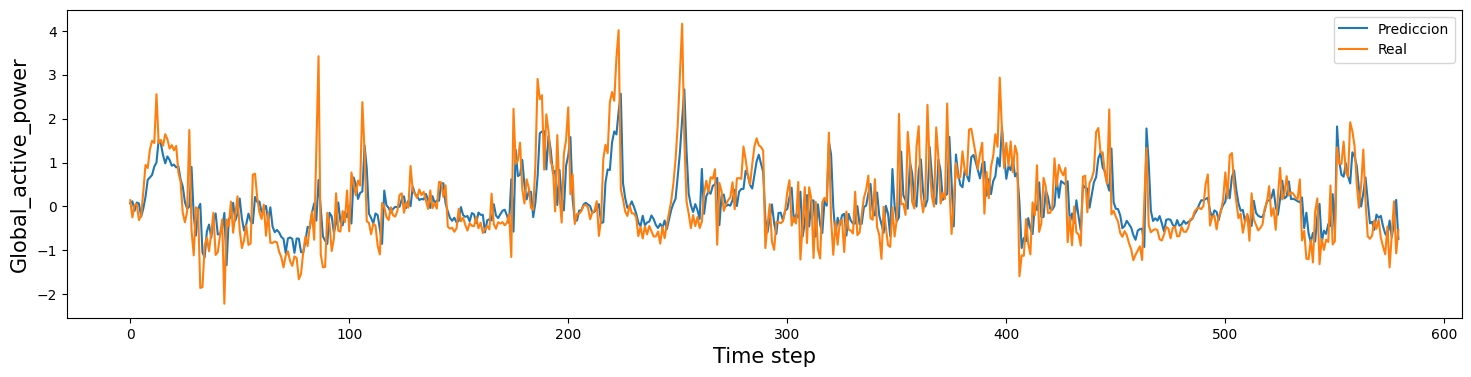

In [70]:
#Grafico de prediccion con el valor real
tiempo=[x for x in range(Y_test.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tiempo,results)
plt.ylabel('Global_active_power', size=15)
plt.plot(tiempo,Y_test)
plt.xlabel('Time step', size=15)
plt.legend(['Prediccion','Real'])
plt.show()

#Exportar resultados

Se guardan los resultados la optimizacion bayesiana

In [71]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los parametros para exportalos a un csv
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  for time,score_mse,score_mae,score_mape,score_rmse in zip(result['time'],result['scores_mse'],result['scores_rmse'],result['scores_mae'],result['scores_mape']):
    k+=1
    nameModel = "SVR_Wallmart" "_"+str(trial)+"_"+str(k)  + "_"+str(result['params']['kernel'])+"_"+str(result['params']['C'])+"_"+str(result['params']['epsilon'])+"_"+str(result['params']['gamma'])
    results.append([nameModel,trial,k,time,score_mse,score_rmse,score_mae,score_mape])

In [72]:
#Se crea dataframe
results_csv=pd.DataFrame(results,columns=['nameModel','trial_optimizacion_bayesiana','Step_validacion','time','MSE','RMSE','MAE','MAPE'])

In [73]:
results_o = results_csv.sort_values(by='MSE', ascending=True)
results_o.head(5)

,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
144,SVR_Wallmart_29_5_linear_1_0.2_auto,29,5,2.730910,0.445496,2.054747,0.667455,0.481996
149,SVR_Wallmart_30_5_linear_1_0.2_auto,30,5,2.757076,0.445496,2.054747,0.667455,0.481996
164,SVR_Wallmart_33_5_linear_1_0.2_auto,33,5,2.732210,0.445496,2.054747,0.667455,0.481996
174,SVR_Wallmart_35_5_linear_1_0.2_auto,35,5,2.730505,0.445496,2.054747,0.667455,0.481996
199,SVR_Wallmart_40_5_linear_1_0.2_auto,40,5,2.733136,0.445496,2.054747,0.667455,0.481996


In [74]:
# Exportar el DataFrame como CSV
results_csv.to_csv('Narmax_results_SVR_Wallmart.csv')

In [75]:
import os
# Ruta de la carpeta que deseas crear
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos/Narmax_result_SVR'

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta_destino):
    # Crear la carpeta si no existe
    os.makedirs(carpeta_destino)

In [76]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los modelos para exportalos a un Json
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  i=0

  nameModel = "SVR" + "_"+str(result['params']['kernel'])+"_"+str(result['params']['C'])+"_"+str(result['params']['epsilon'])+"_"+str(result['params']['gamma'])
  ruta = os.path.join(carpeta_destino, nameModel + ".pkl")
  joblib.dump(result['model'], ruta)